In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
class constraintNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        
        model.add(Conv2D(32,(3,3),input_shape=inputShape,activation='relu',padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Flatten())
        model.add(Dropout(0.2))
        
        model.add(Dense(1024, activation='relu',kernel_constraint=maxnorm(3)))
        model.add(Dropout(0.2))
        
        model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))
        model.add(Dropout(0.2))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [3]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
print(trainX.shape)
print(testX.shape)

[INFO] loading CIFAR-10 data...
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
#normalise the data # To do: other normalisation methods could be used
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [5]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 10, momentum=0.9, nesterov=True)
model = constraintNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
no_epochs=10
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64, epochs=no_epochs, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 278s - loss: 1.9934 - acc: 0.2598 - val_loss: 1.6386 - val_acc: 0.4095
Epoch 2/10
50000/50000 [==============================] - 287s - loss: 1.5393 - acc: 0.4371 - val_loss: 1.4131 - val_acc: 0.4915
Epoch 3/10
50000/50000 [==============================] - 281s - loss: 1.3688 - acc: 0.5023 - val_loss: 1.2985 - val_acc: 0.5264
Epoch 4/10
50000/50000 [==============================] - 276s - loss: 1.2605 - acc: 0.5441 - val_loss: 1.2085 - val_acc: 0.5631
Epoch 5/10
50000/50000 [==============================] - 278s - loss: 1.1804 - acc: 0.5745 - val_loss: 1.1186 - val_acc: 0.6009
Epoch 6/10
50000/50000 [==============================] - 279s - loss: 1.1178 - acc: 0.5968 - val_loss: 1.0661 - val_acc: 0.6190
Epoch 7/10
50000/50000 [==============================] - 278s - loss: 1.0639 - acc: 0.6175 - val_loss: 1.0601 - val_acc: 0

In [6]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.80      0.60      0.69      1000
 automobile       0.77      0.84      0.80      1000
       bird       0.60      0.49      0.54      1000
        cat       0.47      0.41      0.44      1000
       deer       0.60      0.64      0.62      1000
        dog       0.66      0.49      0.56      1000
       frog       0.56      0.91      0.69      1000
      horse       0.84      0.67      0.74      1000
       ship       0.67      0.89      0.76      1000
      truck       0.78      0.70      0.74      1000

avg / total       0.67      0.66      0.66     10000



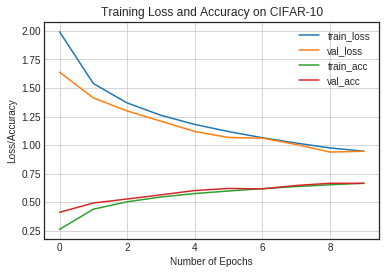

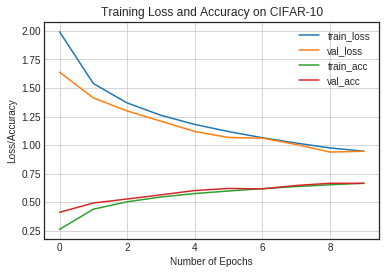

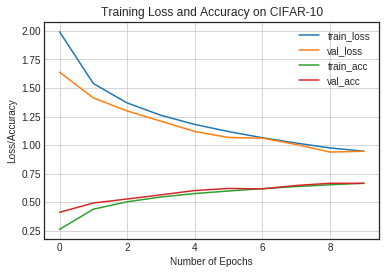

In [9]:
# plot the training loss and accuracy
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, no_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_epochs), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.grid(True)
plt.legend()
plt.show()